# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [7]:
data = pd.read_csv('GermanCredit.csv')
data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [8]:
data.columns
print(np.array(data.columns.values))

['Duration' 'Amount' 'InstallmentRatePercentage' 'ResidenceDuration' 'Age'
 'NumberExistingCredits' 'NumberPeopleMaintenance' 'Telephone'
 'ForeignWorker' 'Class' 'CheckingAccountStatus.lt.0'
 'CheckingAccountStatus.0.to.200' 'CheckingAccountStatus.gt.200'
 'CheckingAccountStatus.none' 'CreditHistory.NoCredit.AllPaid'
 'CreditHistory.ThisBank.AllPaid' 'CreditHistory.PaidDuly'
 'CreditHistory.Delay' 'CreditHistory.Critical' 'Purpose.NewCar'
 'Purpose.UsedCar' 'Purpose.Furniture.Equipment'
 'Purpose.Radio.Television' 'Purpose.DomesticAppliance' 'Purpose.Repairs'
 'Purpose.Education' 'Purpose.Vacation' 'Purpose.Retraining'
 'Purpose.Business' 'Purpose.Other' 'SavingsAccountBonds.lt.100'
 'SavingsAccountBonds.100.to.500' 'SavingsAccountBonds.500.to.1000'
 'SavingsAccountBonds.gt.1000' 'SavingsAccountBonds.Unknown'
 'EmploymentDuration.lt.1' 'EmploymentDuration.1.to.4'
 'EmploymentDuration.4.to.7' 'EmploymentDuration.gt.7'
 'EmploymentDuration.Unemployed' 'Personal.Male.Divorced.Seperated'


In [9]:
# let's create X& y from the dataset
X = data.drop('Class', axis=1)
y = data['Class']

# let's split tree 
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =10  )

In [10]:
# creating functions to calculate 
from sklearn.metrics import confusion_matrix

def metricss(y_test, y_pred):
    print("Classification Report ", classification_report(y_test, y_pred))
    print('\nConfusion Matrix\n',confusion_matrix(y_test, y_pred))

In [11]:
# training model as simple 

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
metricss(y_test, y_pred)

Classification Report                precision    recall  f1-score   support

         Bad       0.55      0.49      0.52        97
        Good       0.77      0.80      0.79       203

    accuracy                           0.70       300
   macro avg       0.66      0.65      0.65       300
weighted avg       0.70      0.70      0.70       300


Confusion Matrix
 [[ 48  49]
 [ 40 163]]


In [12]:
from joblib import dump
from joblib import load
param_grid = {'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':np.arange(1,20, 2),
          'min_samples_split': np.arange(2,20, 2),'min_samples_leaf': np.arange(1,20,2)}
best_model = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=3 )
filename = "tree.sav"
best_model.fit(X_train, y_train)
# building model with best estimator 
best_tree = best_model.best_estimator_
best_tree.fit(X_train, y_train)
y_pred = best_tree.predict(X_test)
metricss(y_test, y_pred)







Classification Report                precision    recall  f1-score   support

         Bad       0.58      0.46      0.52        97
        Good       0.77      0.84      0.80       203

    accuracy                           0.72       300
   macro avg       0.68      0.65      0.66       300
weighted avg       0.71      0.72      0.71       300


Confusion Matrix
 [[ 45  52]
 [ 32 171]]


* After doing some parameter tuning also the values doesn't change that much


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [13]:
! pip install dtreeviz
! conda install graphviz

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/springboard

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.24  |                0         125 KB
    cairo-1.14.12              |       h8948797_3         906 KB
    certifi-2020.6.20          |           py37_0         156 KB
    conda-4.8.3                |           py37_0         2.8 MB
    fontconfig-2.13.0          |       h9420a91_0         227 KB
    fribidi-1.0.9              |       h7b6447c_0         104 KB
    graphite2-1.3.14           |       h23475e2_0          99 KB
    graphviz-2.40.1            |       h21bd128_2         6.5 MB
    harfbuzz-1.8.8             |       hffaf4a1_0         507 KB
    icu-58.2                   |       he6710b0_3        10.5 MB
    libtiff-4.1.0              |       h2733197_1         449 KB

In [39]:
# Your code here! :)
import numpy as np
from dtreeviz.trees import *
d = {"Good":0, "Bad":1}
y_train_enums = np.array([d[value] for index, value in y_train.items()])


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

*Hey Ashwini, How to solve this error ?*

In [40]:
viz = dtreeviz(best_tree, 
               X_train, 
               y_train_enums,
               feature_names=X_train.columns,
               target_name='Classl',
               class_names=["Good", "Bad"]
              )
viz.save('decision_tree_visualize.svg')

ExecutableNotFound: failed to execute ['dot', '-Tsvg', '-o', 'decision_tree_visualize.svg', './decision_tree_visualize'], make sure the Graphviz executables are on your systems' PATH

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Your code here! :)
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

metricss(y_test, y_pred)

Classification Report                precision    recall  f1-score   support

         Bad       0.74      0.40      0.52        97
        Good       0.77      0.93      0.84       203

    accuracy                           0.76       300
   macro avg       0.75      0.67      0.68       300
weighted avg       0.76      0.76      0.74       300


Confusion Matrix
 [[ 39  58]
 [ 14 189]]


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

Feature ranking:
1. feature 1 (0.099863)
2. feature 4 (0.077954)
3. feature 0 (0.065541)
4. feature 12 (0.063455)
5. feature 9 (0.042514)
6. feature 2 (0.032595)
7. feature 3 (0.031426)
8. feature 29 (0.025359)
9. feature 34 (0.021230)
10. feature 18 (0.018809)
11. feature 17 (0.018499)
12. feature 53 (0.018051)
13. feature 5 (0.017611)
14. feature 41 (0.017282)
15. feature 51 (0.016229)
16. feature 10 (0.016086)
17. feature 35 (0.015298)
18. feature 15 (0.015297)
19. feature 21 (0.015116)
20. feature 13 (0.015068)
21. feature 49 (0.014763)
22. feature 7 (0.014589)
23. feature 47 (0.014587)
24. feature 59 (0.014538)
25. feature 55 (0.013647)
26. feature 33 (0.013230)
27. feature 48 (0.013157)
28. feature 36 (0.012688)
29. feature 40 (0.012613)
30. feature 6 (0.012583)
31. feature 50 (0.012238)
32. feature 37 (0.012161)
33. feature 14 (0.011850)
34. feature 39 (0.011638)
35. feature 54 (0.011575)
36. feature 60 (0.011503)
37. feature 27 (0.011065)
38. feature 58 (0.011013)
39. feature 2

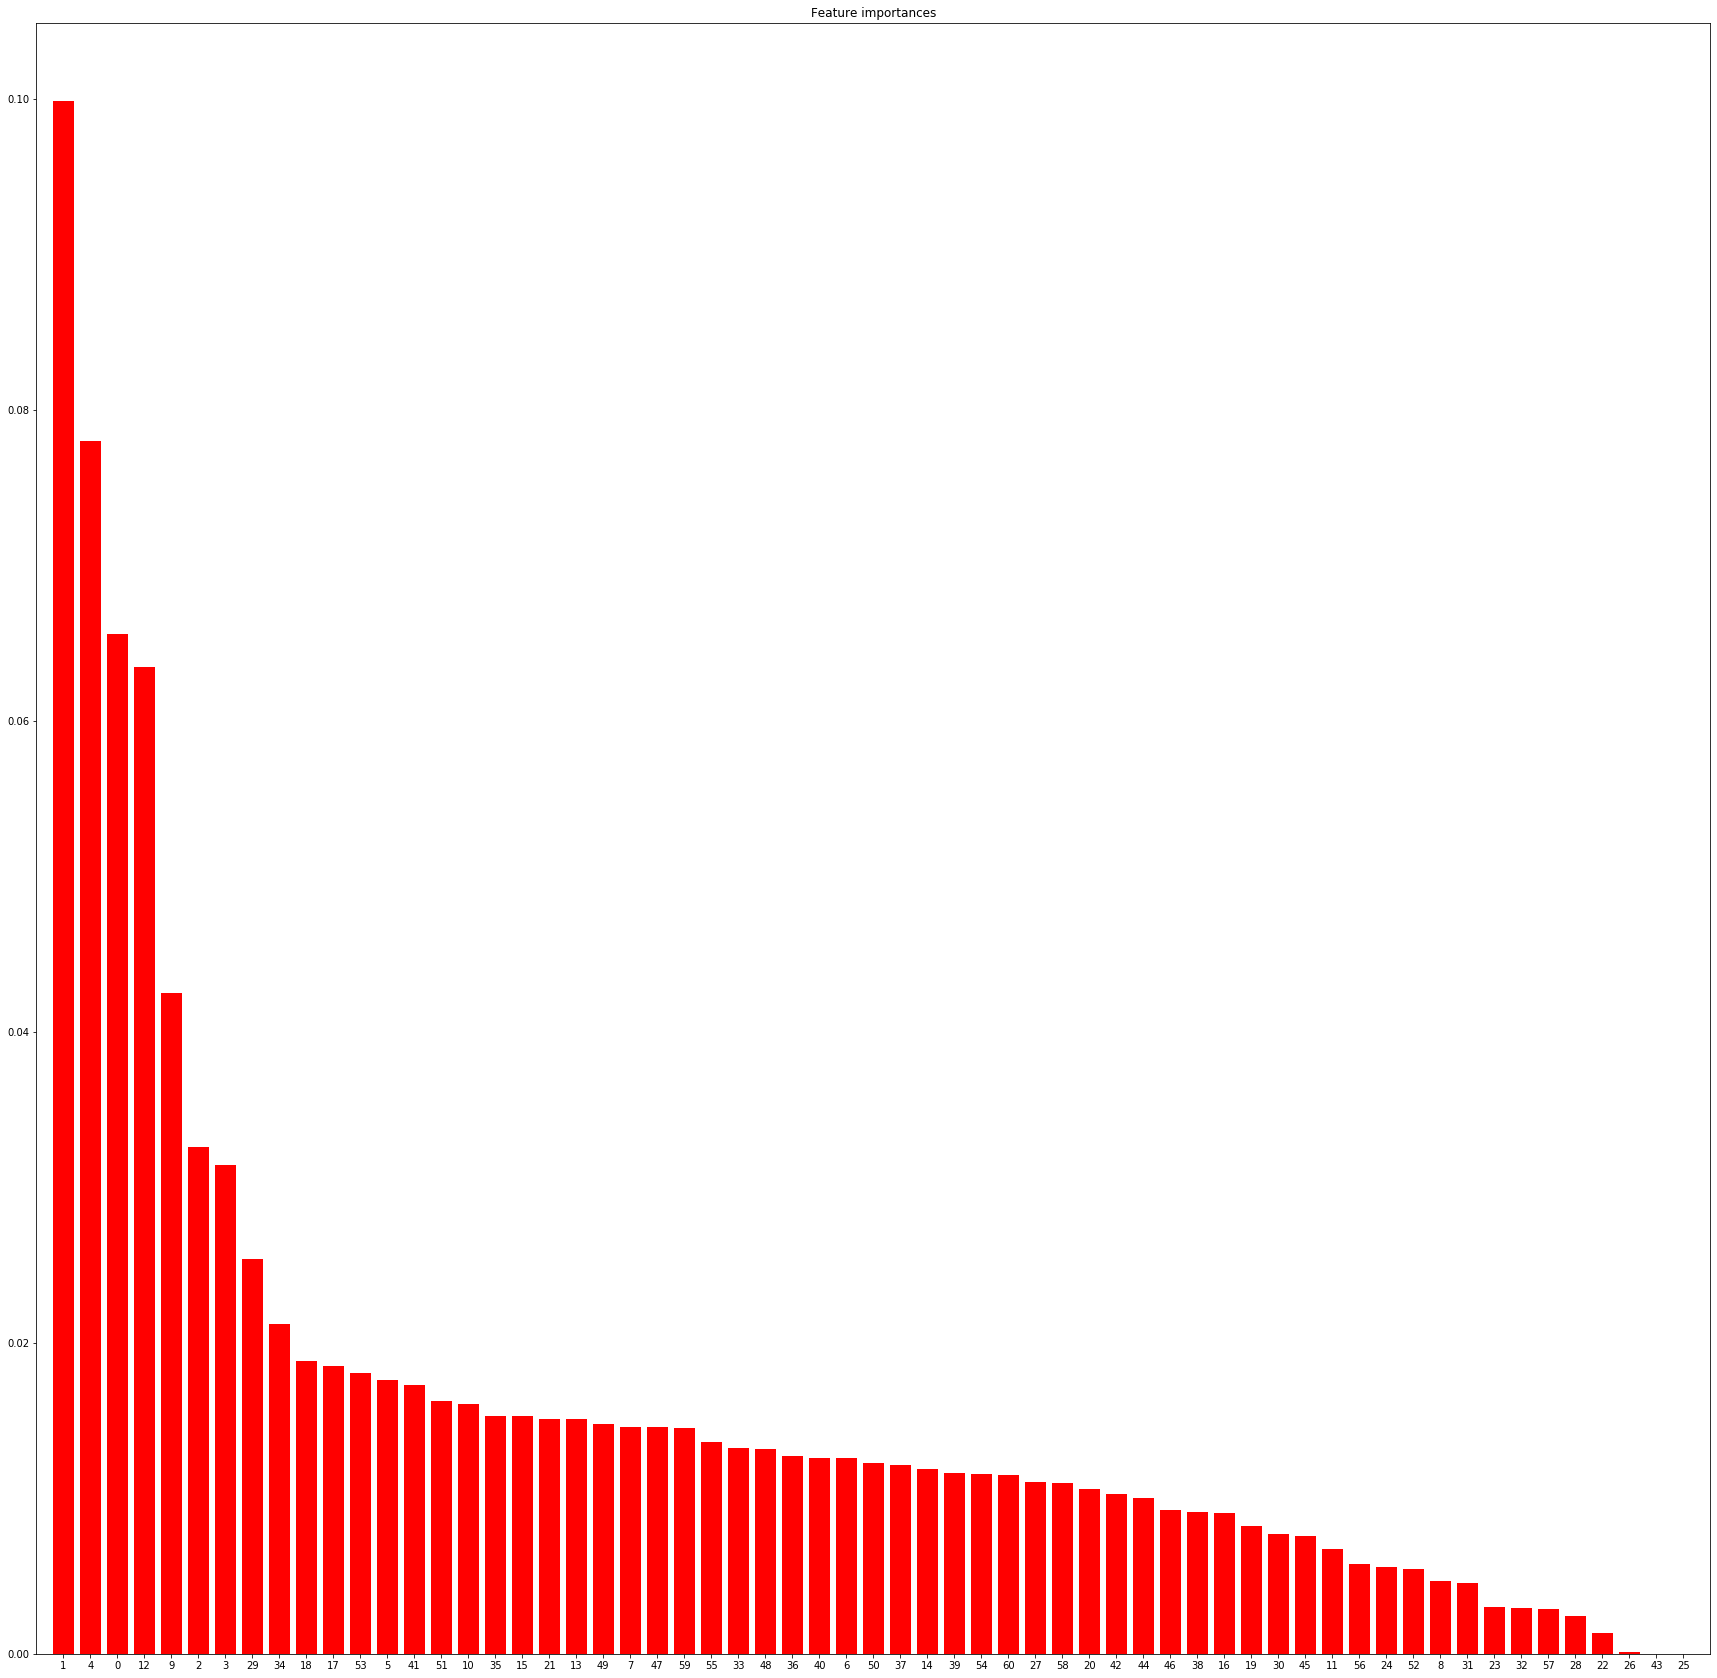

In [18]:
# Your code here

importances = clf.feature_importances_
std = np.std([clf.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure(figsize=(30,30))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [19]:
pd.DataFrame({ 'Feature Importance': importances, 'Feature name': X_train.columns}).sort_values(by=['Feature Importance'], ascending=False).head(6)

,Feature Importance,Feature name
1,0.099863,Amount
4,0.077954,Age
0,0.065541,Duration
12,0.063455,CheckingAccountStatus.none
9,0.042514,CheckingAccountStatus.lt.0
2,0.032595,InstallmentRatePercentage


A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [20]:
! pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

(<Figure size 756x900 with 5 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f513b00de90>,
  'pdp_inter_ax': {'_pdp_x_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f513c086150>,
   '_pdp_y_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f513c06ca10>,
   '_pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f513c1464d0>}})

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


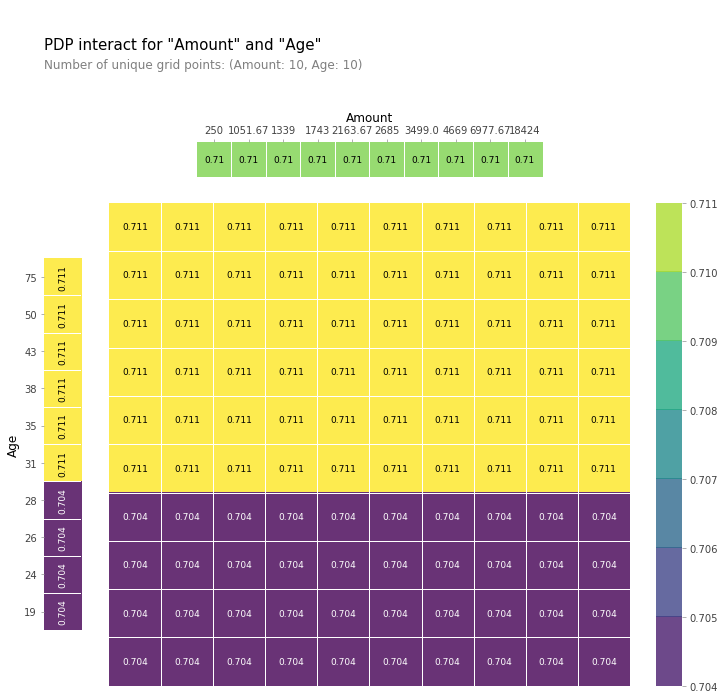

In [21]:
# Your code here!
from pdpbox import pdp
features = ['Amount', 'Age']
pdp_interact = pdp.pdp_interact(best_tree, X_train, X_train.columns, features)
pdp.pdp_interact_plot(pdp_interact, 
                      features,
                      plot_type='grid',
                      plot_pdp=True
                     )




## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [26]:
! conda install -c anaconda py-xgboost --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/springboard

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    blas-1.0                   |              mkl           6 KB  anaconda
    joblib-0.15.1              |             py_0         207 KB  anaconda
    libgfortran-ng-7.3.0       |       hdf63c60_0         1.3 MB  anaconda
    numpy-1.18.5               |   py37ha1c710e_0           4 KB  anaconda
    py-xgboost-0.90            |   py37he6710b0_1          77 KB  anaconda
    scikit-learn-0.23.1        |   py37h423224d_0         6.8 MB  anaconda
    scipy-1.5.0                |   py37h0b6359f_0        18.5 MB  anaconda
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          16 KB  anaconda
    ---------------------------------

In [27]:
! conda install -c conda-forge catboost --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/springboard

  added / updated specs:
    - catboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    catboost-0.23.2            |   py37hc8dfbb8_0        52.9 MB  conda-forge
    certifi-2020.6.20          |   py37hc8dfbb8_0         151 KB  conda-forge
    libblas-3.8.0              |      17_openblas          11 KB  conda-forge
    libcblas-3.8.0             |      17_openblas          11 KB  conda-forge
    libgfortran-ng-7.5.0       |       hdf63c60_6         1.7 MB  conda-forge
    liblapack-3.8.0            |      17_openblas          11 KB  conda-forge
    libopenblas-0.3.10         |       h5ec1e0e_0         7.8 MB  conda-forge
    numpy-1.18.5               |   py37h8960a57_0         5.1 MB  conda-forge
    pandas-1

In [28]:
! conda install -c conda-forge lightgbm --yes

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/springboard

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-0.16.0              |             py_0         203 KB  conda-forge
    lightgbm-2.3.1             |   py37he1b5a44_0         1.0 MB  conda-forge
    scikit-learn-0.23.1        |   py37h8a51577_0         6.8 MB  conda-forge
    threadpoolctl-2.1.0        |     pyh5ca1d4c_0          15 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         8.1 MB

The following NEW packages will be INSTALLED:

  joblib             conda-forge/noarch::joblib-0.16.0-py_0
  lightgbm           conda-forge/linux-64::lightgbm-2.3.1-py37he1b5a44_0
  scikit-learn       conda-forge/linux-64::scikit-learn-0.23.1-py37h8a51577_0
  threadpoolc

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

* {Rushikesh's Edit} In this option task I am fitting the model evaluating which works better 

In [32]:
! pip install xgboost
! pip install catboost
! pip install lightgbm




     |████████████████████████████████| 11.5 MB 14.5 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=9b7acb03a05a64fc866837b396f03df2993579919f0d26b99dd312f95be3f0ad
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [37]:
import xgboost as xgb
import catboost as cat
import lightgbm as lg
XGBOOST = xgb.XGBClassifier()
CATBOOST = cat.CatBoostClassifier()
LIGHTGBM = lg.LGBMClassifier()
model = [XGBOOST, CATBOOST, LIGHTGBM]

In [38]:
for i in model:
    print(i)
    i.fit(X_train, y_train)
    y_pred = i.predict(X_test)
    metricss(y_test, y_pred)
    print('\n')

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='binary:logistic', random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None)
Classification Report                precision    recall  f1-score   support

         Bad       0.60      0.47      0.53        97
        Good       0.77      0.85      0.81       203

    accuracy                           0.73       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.72      0.73      0.72 

* From three model, results of them shows same result but still the parameters are not tunned that's why maybe the results are same after doing some tuning we may will notice the increase in "BAD" parameter result

* Doubts : DTreeviz is not wworking correctly
* Even I tunned the parameter my result some time get worst what is the reason ?
* Using GridSearchCV with thses algorithm is good practice ?
* And how to tunned parameters? 